In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Satyam Sourabh/jupyter/Time Series/dataset/shampoo.csv")

df.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df = pd.read_csv("C:/Users/Satyam Sourabh/jupyter/Time Series/dataset/shampoo.csv", index_col=[0], parse_dates=True)

del df["Inflation"]
df.head()

,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3


In [5]:
ser = df.squeeze()

type(ser)

pandas.core.series.Series

<Axes: xlabel='Month'>

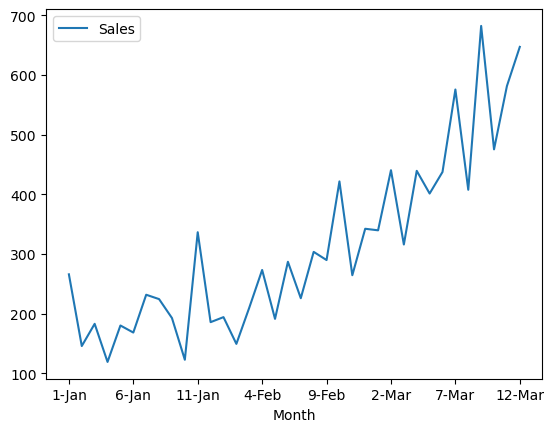

In [6]:
df.plot()

<Axes: xlabel='Month'>

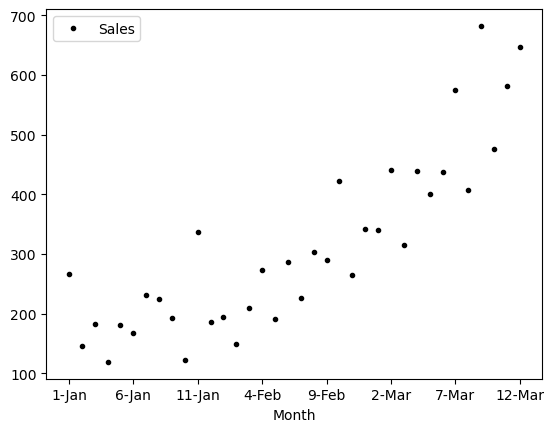

In [7]:
df.plot(style = 'k.')

In [8]:
# datapoints

df.size

36

In [9]:
# stats

df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Smoothing of time series

Smoothing of time series data refers to techniques that are used to remove short-term fluctuations and highlight longer-term trends and cycles. The main purpose of smoothing time series data is to make the data easier to visualize and analyze. Some common techniques for smoothing time series data include:

- Moving Average - Calculating an average of a fixed number of time periods to smooth out short-term fluctuations. For example, a 5-period moving average would calculate the average of the previous 5 data points.

<Axes: xlabel='Month'>

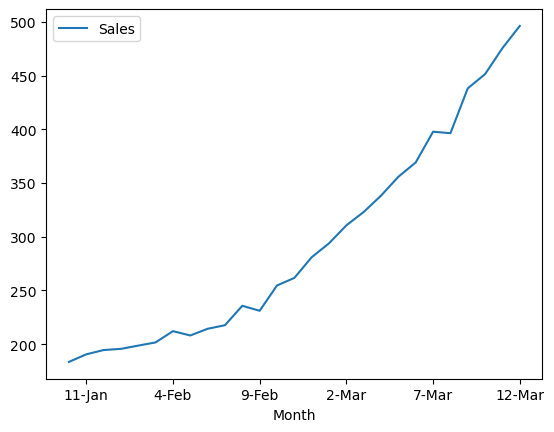

In [10]:
df_ma = df.rolling(window=10).mean()

df_ma.plot()

In [11]:
df.head()

,Sales
Month,
1-Jan,266.0
2-Jan,145.9
3-Jan,183.1
4-Jan,119.3
5-Jan,180.3


In [12]:
# base models - In machine learning, base models refer to simple models that are commonly used as a baseline or starting point before trying more complex models.

# df is the original Pandas DataFrame df.shift(1) shifts the data down by 1 row. So the value from row 0 gets moved to row 1, row 1 value gets moved to row 2 and so on. The first row is filled with NaN.
df_base = pd.concat([df, df.shift(1)], axis = 1) 

df_base.head()

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [13]:
print(df_base.columns)

df_base.columns = ['Actual_Sales', 'Forecast_Sales']

df_base.head()

Index(['Sales', 'Sales'], dtype='object')


,Actual_Sales,Forecast_Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [14]:
# Remove NaN

df_base.dropna(inplace=True)

df_base.head()

,Actual_Sales,Forecast_Sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [15]:
# Error b/w actual and forecast

from sklearn.metrics import mean_squared_error

import numpy as np

In [16]:
df_error = mean_squared_error(df_base.Actual_Sales, df_base.Forecast_Sales)

df_error

11715.388285714285

In [17]:
np.sqrt(df_error)

108.23764726616282

### ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a statistical method for analyzing and forecasting time series data.

Key aspects of ARIMA models:

- AR (AutoRegressive) - The model uses the dependent relationship between current observation and lagged observations. The current value is regressed on previous values.

- I (Integrated) - The use of differencing raw observations (subtracting an observation from an observation at the previous time step) to make the time series stationary.

- MA (Moving Average) - The regression error is a linear combination of error terms at various time lags. Uses the dependency between the current value and residual errors from moving average model applied to lagged observations.

- ARIMA models are denoted as ARIMA(p,d,q) where:
1. p is the order of autoregression

2. d is the degree of differencing

3. q is the order of moving average

- ARIMA models aim to describe the autocorrelations in the data.

- Requires making time series data stationary by differencing, logging or deflating the data.

- Useful for forecasting, price prediction, and modeling seasonality.

- Requires determining optimal parameters p, d, q which relies on plotting ACF and PACF charts.

- More flexible than exponential smoothing and can model non-stationary time series.

ACF and PACF are two important statistical techniques used when modeling time series data and especially when fitting ARIMA models.

**ACF** stands for Autocorrelation Function. It measures the correlation between the time series with a lagged version of itself. The ACF plot shows the autocorrelation coefficient for different time lags.

**PACF** stands for Partial Autocorrelation Function. It measures the correlation between the time series with its own lags after removing the effects of the intervening lags.

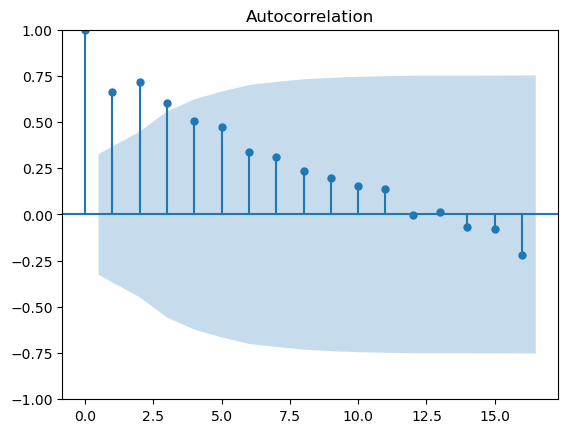

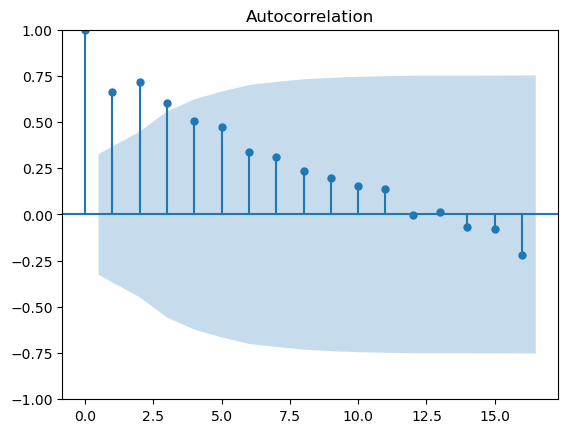

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df) # y-axis : autocorrelation coeff, x-axis : time lags

In [19]:
# q = 3

In [20]:
# just to ignore warning and use pacf method in a better way

from statsmodels.tsa.stattools import pacf

pacf_ywm = pacf(df, method='ywm')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


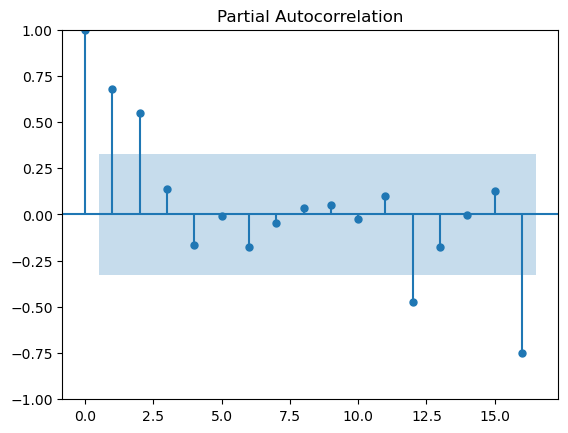

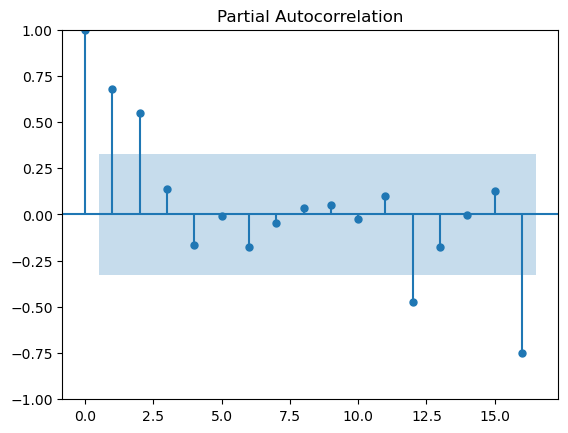

In [21]:
plot_pacf(df)

In [22]:
# p = 2

**so, p = 2, d = 0-2, q = 3**

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
df_train = df[0:25]
df_test = df[25:36]

In [40]:
df_model = ARIMA(df_train, order=(2,1,3))

In [41]:
df_model_fit = df_model.fit()

In [42]:
df_model_fit.aic

278.46527471993494

In [43]:
df_forecast = df_model_fit.forecast(steps=11)

In [44]:
np.sqrt(mean_squared_error(df_test, df_forecast))

132.27752173594985

**Base line model is much better doing the prediction than the ARIMA model**

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
p_values = range(0, 5)
d_values = range(0, 3) 
q_values = range(0, 5)

for p in p_values:
    for d in d_values:
        for q in q_values:
            
            order = (p,d,q)
            
            train = df[:25]
            test = df[25:36]
            
            predictions = list()
            
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order=order)  
                    model_fit = model.fit()
            
                    y_pred = model_fit.forecast()
                    predictions.append(y_pred)
            
                    mse = mean_squared_error(test, predictions)  
                    print('ARIMA{} MSE={}'.format(order, mse))
                
                except:
                    continue

ARIMA(0, 0, 0) MSE=77950.15735064412
ARIMA(0, 0, 1) MSE=70120.55328642676
ARIMA(0, 0, 2) MSE=58566.61542941707
ARIMA(0, 0, 3) MSE=62031.47329755516
ARIMA(0, 0, 4) MSE=36278.060368956874
ARIMA(0, 1, 0) MSE=34770.73090909091
ARIMA(0, 1, 1) MSE=40718.13783599281
ARIMA(0, 1, 2) MSE=36648.76322133004
ARIMA(0, 1, 3) MSE=30751.093380839335
ARIMA(0, 1, 4) MSE=31626.445189733247
ARIMA(0, 2, 0) MSE=35565.14909090905
ARIMA(0, 2, 1) MSE=33820.85933155432
ARIMA(0, 2, 2) MSE=27226.942640074718
ARIMA(0, 2, 3) MSE=31874.27925131129
ARIMA(0, 2, 4) MSE=28727.03213730046
ARIMA(1, 0, 0) MSE=61157.42843184771
ARIMA(1, 0, 1) MSE=46528.827021051926
ARIMA(1, 0, 2) MSE=43922.12541460537
ARIMA(1, 0, 3) MSE=35346.30988104363
ARIMA(1, 0, 4) MSE=30366.046590885264
ARIMA(1, 1, 0) MSE=34256.17720141014
ARIMA(1, 1, 1) MSE=38734.23214579871
ARIMA(1, 1, 2) MSE=34373.95046720097
ARIMA(1, 1, 3) MSE=34805.12596911564
ARIMA(1, 1, 4) MSE=25899.992287372446
ARIMA(1, 2, 0) MSE=20017.83358483279
ARIMA(1, 2, 1) MSE=31714.647899

In [34]:
np.sqrt(16103.878549574552)

126.90105811053962

**=>** ARIMA(4, 2, 3) is better than ARIMA(2,1,3)